Shape of training data: (140, 77760)
Shape of test data: (15, 77760)
Here is the mean face:


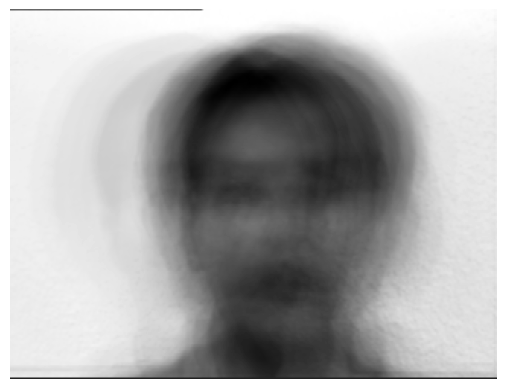

In [182]:
import matplotlib.pyplot as plt
import numpy as np

height, width = 243, 320

image_path = '../data/'

# Load the data
images = [] # will contain all images
normal_images = [] # will contain only the normal images
train_images = [] # will contain only the normal images
test_images = [] # will contain every other image
image_types = ['glasses', 'centerlight', 'normal', 'rightlight', 'sad', 'wink', 'surprised', 'noglasses', 'happy', 'leftlight', 'sleepy']
for i in range(1, 15):
    for j in range(10):
        image = plt.imread(image_path + 'subject' + str(i).zfill(2) + '.' + str(image_types[j]))
        # convert to np array
        image = np.array(image)
        # flatten the image
        image = image.flatten().T
        images.append(image)
        train_images.append(image)

# add the test images
for i in range(1, 16):
    for j in range(10, 11):
        image = plt.imread(image_path + 'subject' + str(i).zfill(2) + '.' + str(image_types[j]))
        # convert to np array
        image = np.array(image)
        # flatten the image
        image = image.flatten().T
        images.append(image)
        test_images.append(image)

# add the normal images
for i in range(1, 15):
    image = plt.imread(image_path + 'subject' + str(i).zfill(2) + '.' + str(image_types[2]))
    # convert to np array
    image = np.array(image)
    # flatten the image
    image = image.flatten().T
    normal_images.append(image)

test_images = np.array(test_images) # not going to be touched till testing
train_images = np.array(train_images)

print("Shape of training data:", train_images.shape)
print("Shape of test data:", test_images.shape)

# calculate the mean face
mean_face = np.mean(train_images, axis=0)
print("Here is the mean face:")
plt.imshow(mean_face.reshape(height, width), cmap='gray')
plt.axis('off')
plt.show()

# subtract the mean face from the training data
train_images = train_images - mean_face


In [183]:
# calculate the covariance matrix of the training data
cov_matrix = np.cov(train_images) / len(train_images)
print("Shape of covariance matrix:", cov_matrix.shape)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1] # sort in descending order
eigenvalues = eigenvalues[idx] # sorted eigenvalues
eigenvectors = eigenvectors[:, idx] # sorted eigenvectors

# compute the eigenfaces
eigenfaces = np.dot(train_images.T, eigenvectors).T

print("Shape of eigenfaces:", eigenfaces.shape)

# Normalize the eigenfaces - meaning that the length of each eigenface vector is 1
for i in range(len(eigenfaces)):
    eigenfaces[i] = eigenfaces[i] / np.linalg.norm(eigenfaces[i])

print("Shape of eigenfaces after normalization:", eigenfaces.shape)


Shape of covariance matrix: (140, 140)
Shape of eigenfaces: (140, 77760)
Shape of eigenfaces after normalization: (140, 77760)


In [184]:
def test(image_idx):
    # choose a threshold
    not_face_threshold = 25000
    num_chosen_eigenfaces = 15

    test_image = test_images[image_idx] - mean_face
    # print("Reconstructed image vs Test Image:")


    omega = eigenfaces[: num_chosen_eigenfaces].dot(test_image) # projection of test image onto the face space
    reconstructed_image = eigenfaces[:num_chosen_eigenfaces].T.dot(omega) # reconstruction of the test image

    # calculate the euclidean distance between the test image and the reconstructed image
    euclidean_distance = np.linalg.norm(test_image - reconstructed_image)

    print("Euclidean distance between the test image and the reconstructed image:", euclidean_distance)
    if euclidean_distance < not_face_threshold:
        print("This is a face")
    else:
        print("This is not a face")


    unknown_face_threshold = 5000

    # find the image that is closest to the test image
    min_distance = float('inf')
    min_distance_index = -1

    for i in range(len(train_images)):
        omega_i = eigenfaces[:num_chosen_eigenfaces].dot(train_images[i]) # projection of train image onto the face space

        distance = np.linalg.norm(omega - omega_i) # euclidean distance between the projected test image and the projected train image

        if distance < min_distance:
            min_distance = distance
            min_distance_index = i

    print("Euclidean distance between the test image and the closest image in the training set:", min_distance)

    if min_distance < unknown_face_threshold:
        print("This is a known face")
    else:
        print("This is not a known face")

    # plot the closest image
    plt.title("Closest image vs test image")
    plt.subplot(1, 2, 1)
    plt.imshow((test_image + mean_face).reshape(height, width), cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow((train_images[min_distance_index] + mean_face).reshape(height, width), cmap='gray')
    plt.axis('off')
    plt.show()


In [185]:
print("Test images size:", len(test_images))

Test images size: 15


Euclidean distance between the test image and the reconstructed image: 9747.113806107323
This is a face
Euclidean distance between the test image and the closest image in the training set: 1247.5732037042533
This is a known face


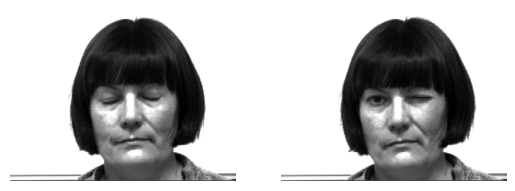

Euclidean distance between the test image and the reconstructed image: 8200.914497988379
This is a face
Euclidean distance between the test image and the closest image in the training set: 1585.2224759598596
This is a known face


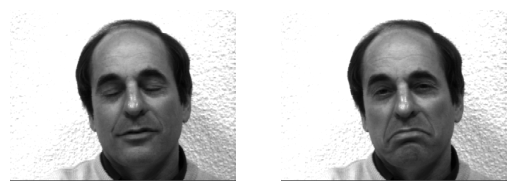

Euclidean distance between the test image and the reconstructed image: 10987.077392018298
This is a face
Euclidean distance between the test image and the closest image in the training set: 952.4438505580838
This is a known face


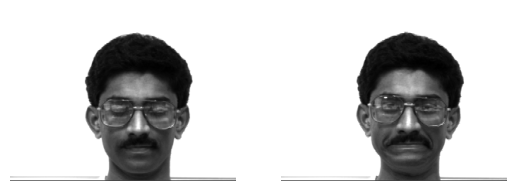

Euclidean distance between the test image and the reconstructed image: 10335.200747627468
This is a face
Euclidean distance between the test image and the closest image in the training set: 1908.7317721223897
This is a known face


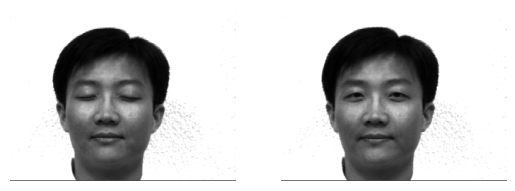

Euclidean distance between the test image and the reconstructed image: 13428.449850144067
This is a face
Euclidean distance between the test image and the closest image in the training set: 5309.590405227552
This is not a known face


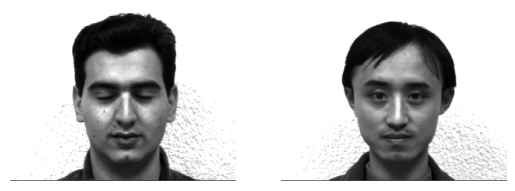

In [186]:
for i in range(10, 15):
    test(i)